In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import glob
import umap

Se ha escogido un dataset de 1078 imagenes de 32X32 pixeles de imágenes de 6 letras y simbólos dibujados a mano con diferentes colores. Con el dataset viene un archivo que asocia cada imagen con su correspondiente simbolo. Se incluye el dataset en el repositorio y se lee a continuación. También se ha intentado hacer el analisis con UMAP usando diferentes valores de n_neighbors, min_dist y metric. También se ha hecho clustering con K-means y se ha graficado las imagénes que pertenecierían a un correspondiente cluster. Al final se comenta los resultados.

# Nota: Tuve que subir el archivo de las imagenes comprimidas ya que github no dejaba subir las 1000 imagenes

In [28]:
files = glob.glob("letters2/*.png")
n_files = len(files)

letras = pd.read_csv("letters2.txt")

In [29]:
im = []
    
for i, f in enumerate(files): 
    ii = plt.imread(f)
    d= ii.flatten()
    im.append(d)

X = np.ones((len(im), len(im[0])))

for i,img in enumerate(im):
    if len(img)!=4096:
        print(files[i])

In [30]:
letras_num = letras['label']
letras_let = letras['letter']
letras_file = letras['file']

In [31]:
files_order = []
for i,ii in enumerate(files):    
    ii.split("/")
    files_order.append(ii[9:])  

In [32]:
letras_num_2 = np.zeros(len(letras_num))
letras_let_2 = ['']*(len(letras_let))

for j,jj in enumerate(files_order):
    index_ = files_order.index(letras_file[j])
    letras_num_2[index_]=letras_num[j]
    letras_let_2[index_]=letras_let[j]

# -----------------------------------------------------------------------------------

# n_neighbors=10, min_dist = 0.1, metric ='euclidean'

In [33]:
reducer = umap.UMAP(n_neighbors=10, min_dist = 0.1, metric ='euclidean')
reducer.fit(X)
embedding = reducer.transform(X)

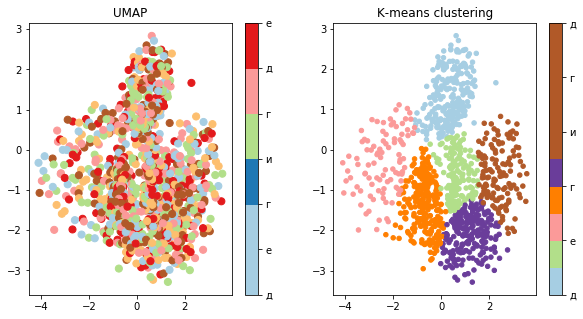

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.title("UMAP")
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticklabels(letras_let_2)


# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.title("K-means clustering")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)


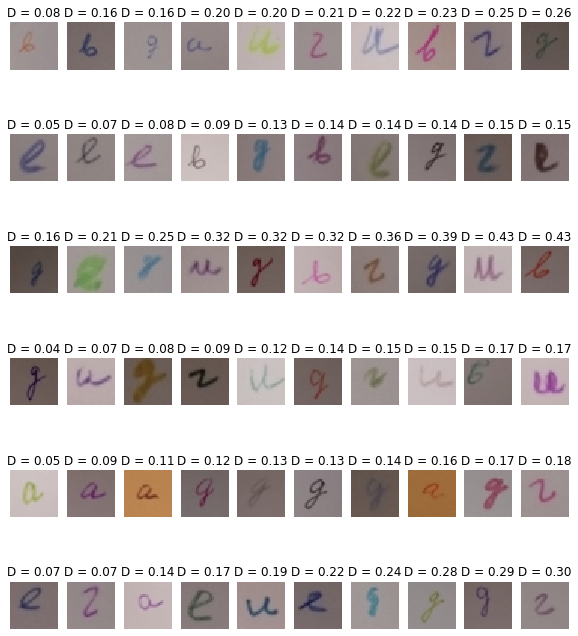

In [35]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

# ----------------------------------------------------------------------------

## n_neighbors=2, min_dist = 0.9, metric ='euclidean'

In [36]:
reducer = umap.UMAP(n_neighbors=2, min_dist = 0.9, metric ='euclidean')
reducer.fit(X)
embedding = reducer.transform(X)

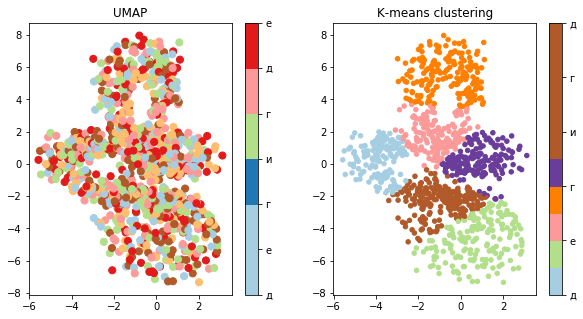

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.title("UMAP")
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticklabels(letras_let_2)
# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.title("K-means clustering")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

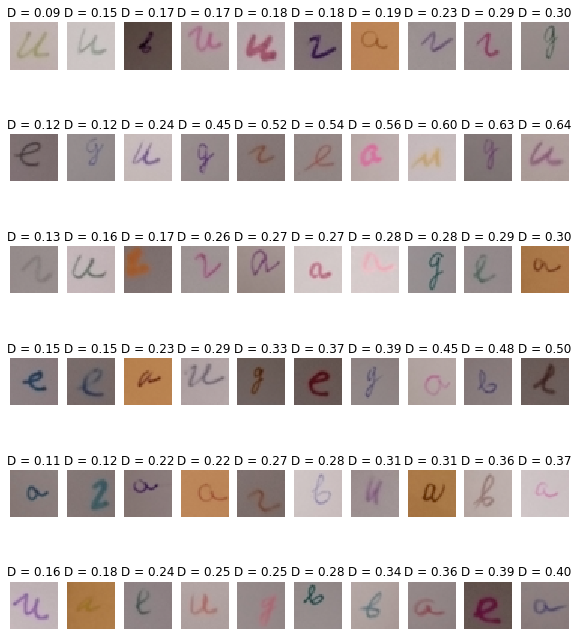

In [38]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

# ---------------------------------------------------------------------------

# n_neighbors=25, min_dist = 0.1, metric ='minkowski'

In [39]:
reducer = umap.UMAP(n_neighbors=25, min_dist = 0.1, metric ='minkowski')
reducer.fit(X)
embedding = reducer.transform(X)

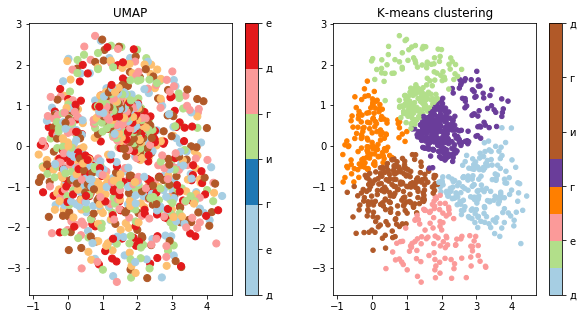

In [40]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.title("UMAP")
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticklabels(letras_let_2)

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.title("K-means clustering")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

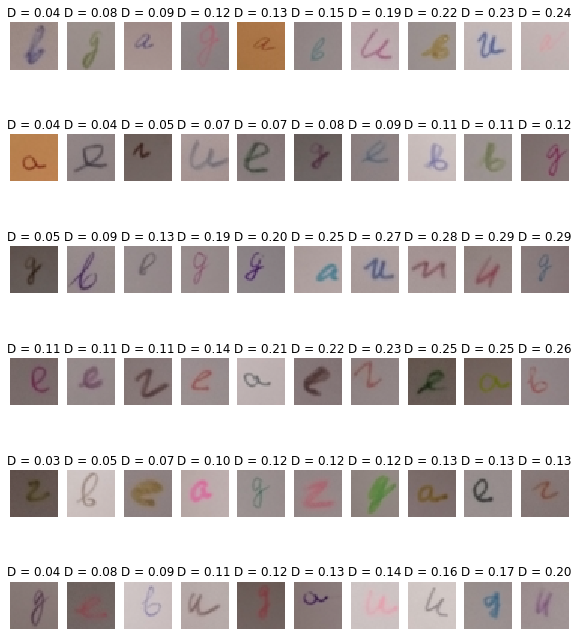

In [41]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

# ---------------------------------------------------------------------------

# n_neighbors=25, min_dist = 0.1, metric ='cosine'

In [42]:
reducer = umap.UMAP(n_neighbors=25, min_dist = 0.1, metric ='cosine')
reducer.fit(X)
embedding = reducer.transform(X)

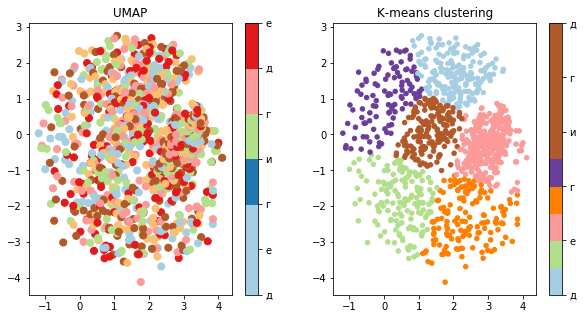

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.title("UMAP")
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticklabels(letras_let_2)

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.title("K-means clustering")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

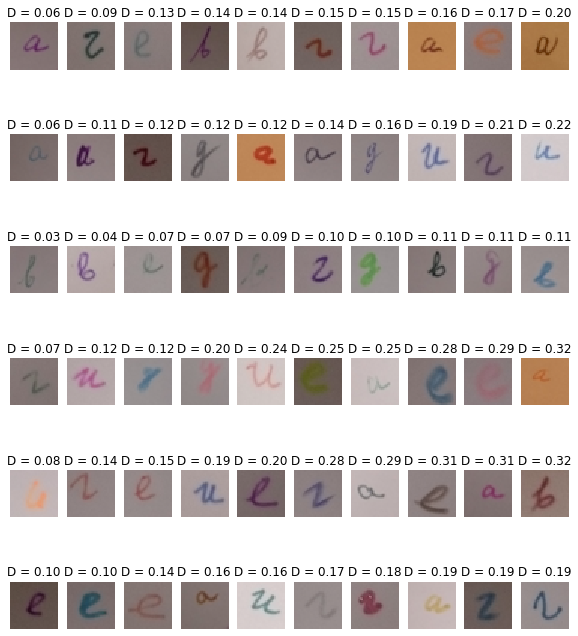

In [44]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

# ----------------------------------------------------------------------------

## n_neighbors=25, min_dist = 0.1, metric ='euclidean'

In [45]:
reducer = umap.UMAP(n_neighbors=25, min_dist = 0.1, metric ='euclidean')
reducer.fit(X)
embedding = reducer.transform(X)

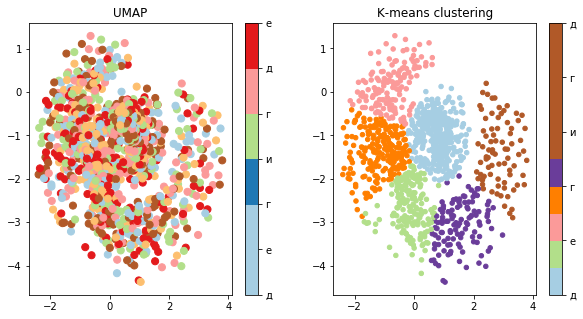

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.title("UMAP")
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticklabels(letras_let_2)

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.title("K-means clustering")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

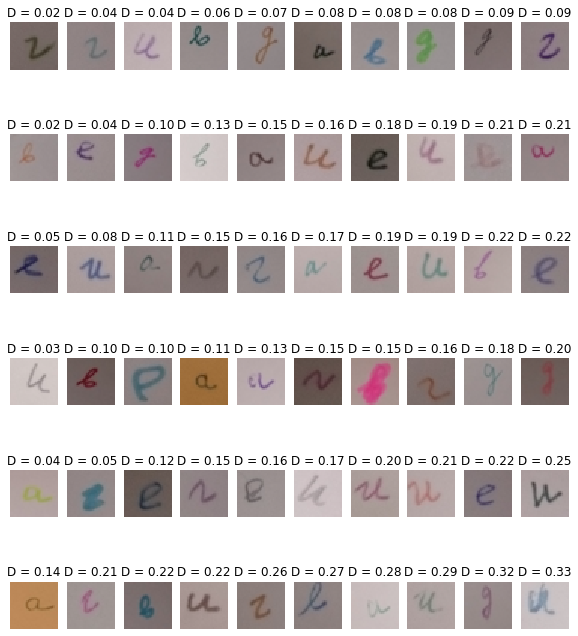

In [47]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

# ----------------------------------------------------------------------------

## n_neighbors=25, min_dist = 0.9, metric ='minkowski'

In [48]:
reducer = umap.UMAP(n_neighbors=25, min_dist = 0.9, metric ='minkowski')
reducer.fit(X)
embedding = reducer.transform(X)

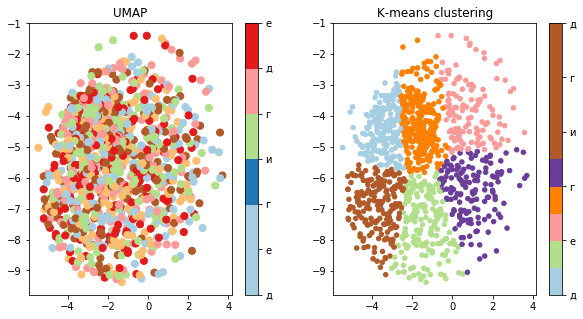

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.title("UMAP")
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticklabels(letras_let_2)
# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.title("K-means clustering")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

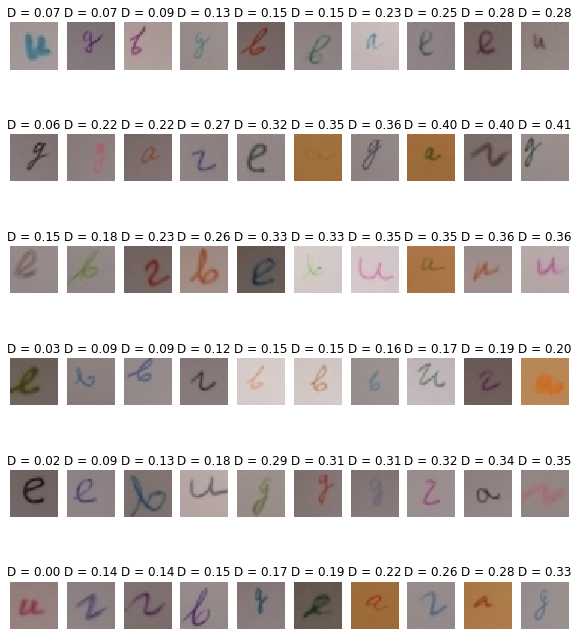

In [50]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

# ----------------------------------------------------------------------------

## n_neighbors=50, min_dist = 0.1, metric ='minkowski'

In [51]:
reducer = umap.UMAP(n_neighbors=50, min_dist = 0.1, metric ='minkowski')
reducer.fit(X)
embedding = reducer.transform(X)

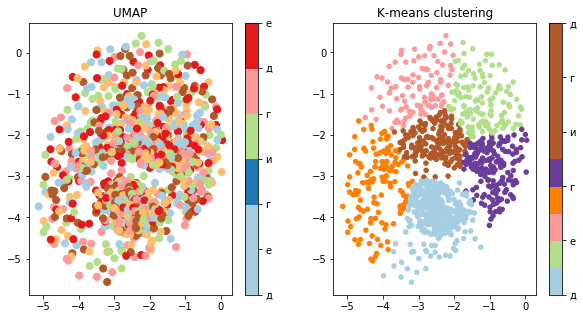

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.title("UMAP")
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticklabels(letras_let_2)

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.title("K-means clustering")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

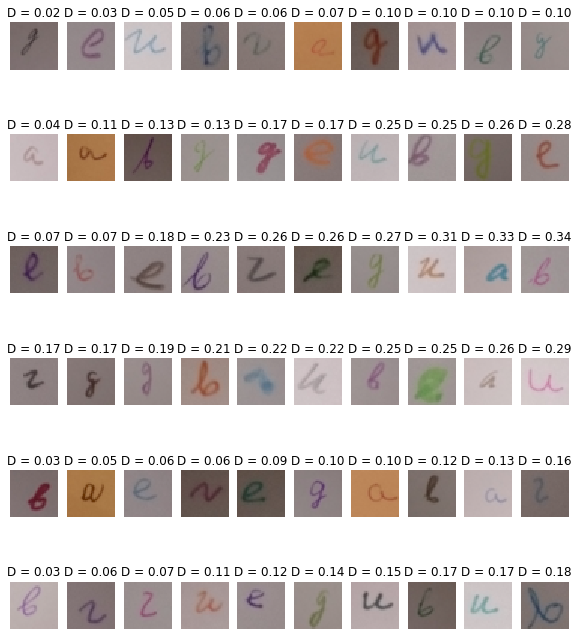

In [53]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

Conclusiones:

A pesar que hay seis simbolos claros en la imagenes no hay una clasificación de cluster claros. Se varió el n_neighbors entre 2 y 50, el min_dist con los valores 0.1, 0.5 y 0.9 y finalmente el metric con los tres tipos euclidean, minkowski y cosine. El resultado donde mejor clasifica es para n_neighbors=25, min_dist=0.1 y metric=minkowski. En este caso, selecciona simbolos con colores similares (colores mas oscuros) y los clusters reunen letras similares aunque confunde u con a y g con b aparentemente. Sin embargo al cambiar la metrica de minkowski a cosine, selecciona en sus clusters mas simbolos con colores claros (magenta, verde claro, azul claro, etc) que con los demás parametros escogidos. Finalmente, después de intentar con varios parámetros no se logra hacer clusters de simbolos similares.
